In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
exit_notes_df = pd.read_excel('..\data\TEIS Exit Data for NSS.xlsx', sheet_name = 'Exit Notes')
exit_notes_df

,POE,Child ID,DOB,Notification Date,Initial Eligibility Date,Initial IFSP Date,Latest IFSP Date,Exit Reason,Exit Date,Days from I-IFSP to Exit,Exit Note
0,UC,471738,2019-02-28,2019-10-17,2019-10-29,2019-10-31,2020-05-12,618 - Parent withdraw,2020-09-21,326,* No Exit ECO available due to COVID-19
1,FT,449030,2018-07-22,2018-11-07,2018-12-03,2018-12-18,2021-03-04,618 - Moved out of state,2021-03-06,809,"***family moving out of state March 2021, and ..."
2,FT,463311,2017-07-09,2019-05-24,2019-06-19,2019-07-02,2020-06-22,618 - Part B eligibility not determined,2020-07-08,372,**Completed the transition planning conference...
3,FT,463313,2017-07-09,2019-05-24,2019-06-19,2019-07-02,2020-06-22,618 - Part B eligibility not determined,2020-07-08,372,**Completed the transition planning conference...
4,FT,469194,2017-08-31,2019-09-04,2019-10-02,2019-10-11,2020-05-26,618 - Part B eligibility not determined,2020-08-30,324,**Due to the impact of the COVID-19 pandemic a...
...,...,...,...,...,...,...,...,...,...,...,...
5577,MD,491609,2018-12-22,2020-10-20,2020-10-30,2020-11-09,2021-03-05,618 - Attempts to contact unsuccessful,2021-05-17,189,NaN
5578,GN,491743,2018-06-05,2020-10-22,2020-11-05,2020-11-09,2021-05-04,618 - Part B eligibility not determined,2021-06-04,207,NaN
5579,ET,491879,2019-04-24,2020-10-26,2020-11-02,2020-11-04,2021-04-15,618 - Parent withdraw,2021-05-06,183,NaN
5580,SC,492267,2018-06-01,2020-10-30,2020-11-17,2020-11-24,2021-04-15,618 - Part B eligibility not determined,2021-05-31,188,NaN


In [4]:
exit_reason = exit_notes_df['Exit Reason'].value_counts()
exit_reason

618 - Part B eligibility not determined                                 1958
618 - Parent withdraw                                                   1243
618 - Part B eligible                                                   1173
618 - Attempts to contact unsuccessful                                   566
618 - Not eligible for Part B – Exit with referral to other programs     245
618 - Moved out of state                                                 168
618 - Not eligible for Part B – Exit with no referrals                   162
618 - Completion of IFSP/ no longer requires services                     57
618 - Deceased                                                            10
Name: Exit Reason, dtype: int64

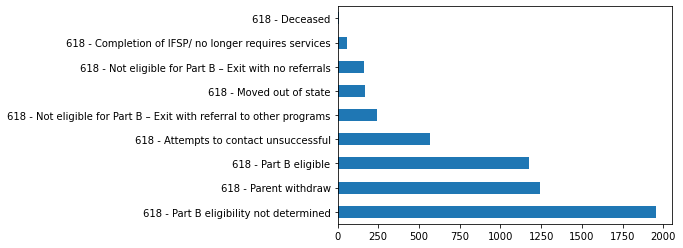

In [5]:
exit_reason.plot(kind = 'barh');

In [6]:
# Child Age at Exit
exit_notes_df['child_age_at_exit'] = exit_notes_df['Exit Date'] - exit_notes_df['DOB']
exit_notes_df.child_age_at_exit = exit_notes_df.child_age_at_exit.dt.days.astype(int)


<AxesSubplot:xlabel='child_age_at_exit', ylabel='Days from I-IFSP to Exit'>

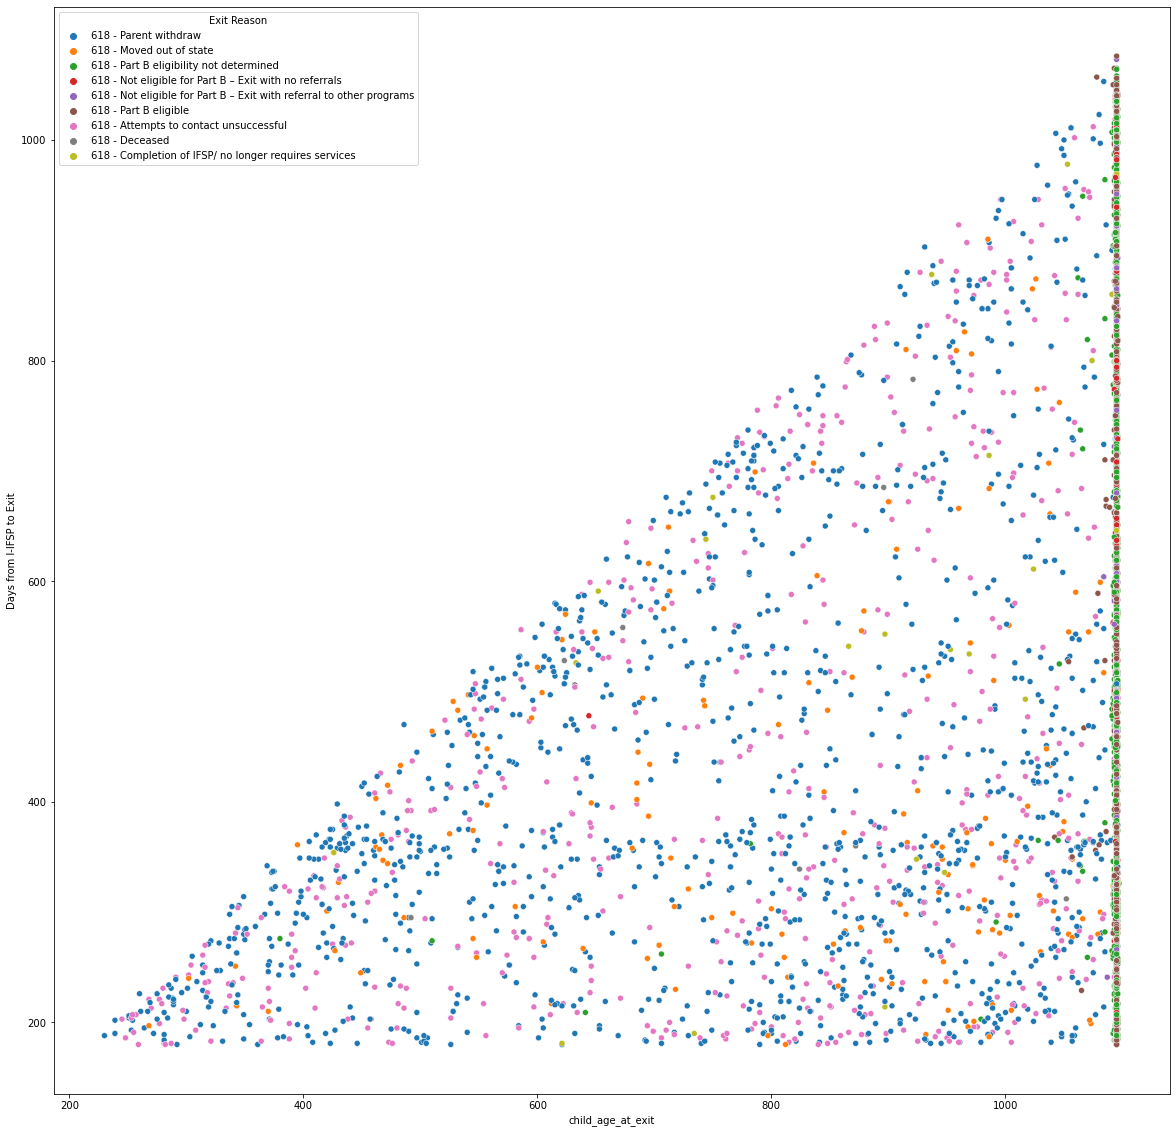

In [9]:
plt.figure(figsize = (20,20))
sns.scatterplot(data = exit_notes_df,
                x = 'child_age_at_exit',
                y = 'Days from I-IFSP to Exit',
                hue = 'Exit Reason')


In [20]:
exit_exit = exit_reason.to_frame().reset_index()
exit_exit

,index,Exit Reason
0,618 - Part B eligibility not determined,1958
1,618 - Parent withdraw,1243
2,618 - Part B eligible,1173
3,618 - Attempts to contact unsuccessful,566
4,618 - Not eligible for Part B – Exit with refe...,245
5,618 - Moved out of state,168
6,618 - Not eligible for Part B – Exit with no r...,162
7,618 - Completion of IFSP/ no longer requires s...,57
8,618 - Deceased,10


In [22]:
age_out = exit_exit.loc[0]['Exit Reason'] + exit_exit.loc[2]['Exit Reason'] + exit_exit.loc[4]['Exit Reason'] + exit_exit.loc[6]['Exit Reason']
other_reason = exit_exit.loc[1]['Exit Reason'] + exit_exit.loc[3]['Exit Reason'] + exit_exit.loc[5]['Exit Reason'] + exit_exit.loc[7]['Exit Reason'] + exit_exit.loc[8]['Exit Reason']

In [24]:
exit_why_df = pd.DataFrame({
    'Exit Reason':
    ['Age Out','Other'],
    'Student Count':
    [age_out, other_reason]
})
print(exit_why_df)

  Exit Reason  Student Count
0     Age Out           3538
1       Other           2044


In [28]:
why = np.array([3538, 2044])
labels = ['Age Out', 'Other Reason']

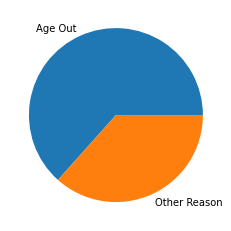

In [29]:
plt.pie(why, labels = labels)
plt.show()